In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
from utils import plot_returns

In [21]:
# Download front-month futures data of S&P500, 10-year Treasuries, gold and US dollar
symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F']
data = yf.download(symbols, auto_adjust=False)
# Resample data so that we deal with monthly data instead of daily to reduce noise
data = data.resample("ME").last()
data.index = pd.to_datetime(data.index)
# Subset adjusted close prices and fill NaNs with value know at time t
# Drop rows with unknown prices in the beginning of the dataset
prices = data["Adj Close"].ffill().dropna()
prices.index = pd.to_datetime(prices.index)

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


In [22]:
# Compute logarithmic returns
log_returns = np.log(prices).diff()
# Compute risk parity weights
annual_vol = log_returns.std() * np.sqrt(12)
inverse_vol = 1 / annual_vol
risk_parity_weights = inverse_vol / inverse_vol.sum()
weighted_returns = (log_returns * risk_parity_weights).sum(axis=1)

In [23]:
# Annualize returns and volatility
annualized_return = weighted_returns.mean() * 12
annualized_vol = weighted_returns.std() * np.sqrt(12)

In [24]:
# Calculate the Sharpe Ratio
if annualized_vol != 0:
    sharpe_ratio = annualized_return / annualized_vol
else:
    sharpe_ratio = np.nan
# Calculate the Sortino Ratio
downside_vol = weighted_returns[weighted_returns<0].std() * np.sqrt(12)
if downside_vol != 0:
    sortino_ratio = annualized_return / downside_vol
else:
    sortino_ratio = np.nan
# Calculate the Calmar Ratio
cum_returns = np.exp(weighted_returns.cumsum())
drawdowns = (cum_returns.cummax() - cum_returns) / cum_returns.cummax()
max_drawdown = np.max(drawdowns)
if max_drawdown != 0:
    calmar_ratio = annualized_return / max_drawdown
else:
    calmar_ratio = np.nan

In [25]:
print()
print(f"annualized_return: {np.round(annualized_return * 100, 1)}%")
print(f"annualized_volatility: {np.round(annualized_vol * 100, 1)}%")
print(f"downside_volatility: {np.round(downside_vol * 100, 1)}%")
print(f"max_drawdown: {np.round(max_drawdown * 100, 1)}%")
print()
print(f"sharpe_ratio: {np.round(sharpe_ratio, 2)}")
print(f"sortino_ratio: {np.round(sortino_ratio, 2)}")
print(f"calmar_ratio: {np.round(calmar_ratio, 2)}")
print()


annualized_return: 0.0%
annualized_volatility: 0.0%
downside_volatility: nan%
max_drawdown: 0.0%

sharpe_ratio: nan
sortino_ratio: nan
calmar_ratio: nan



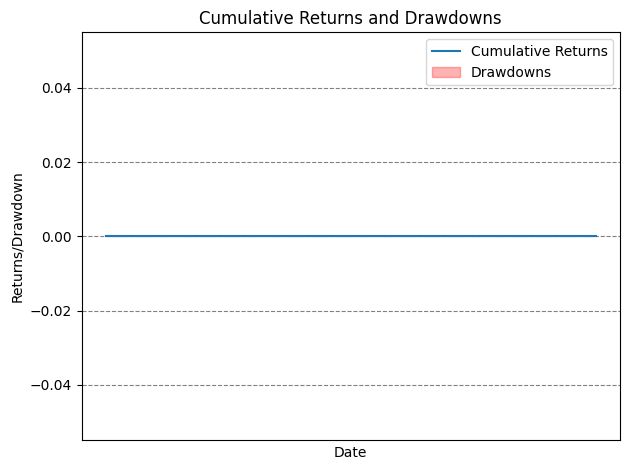

In [26]:
plot_returns(weighted_returns)  # Plot the cumulative returns of the risk parity portfolio